<a href="https://colab.research.google.com/github/Aya2011Salah/Aya2011Salah/blob/main/cleaning_data_synx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64
عدد الصفوف قبل الإزالة: 9800
عدد الصفوف بعد الإزالة: 9800
تمت إزالة 0 صفوف تحتوي على قيم متطرفة.
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-12-06 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-11-10 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-11-10 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        C

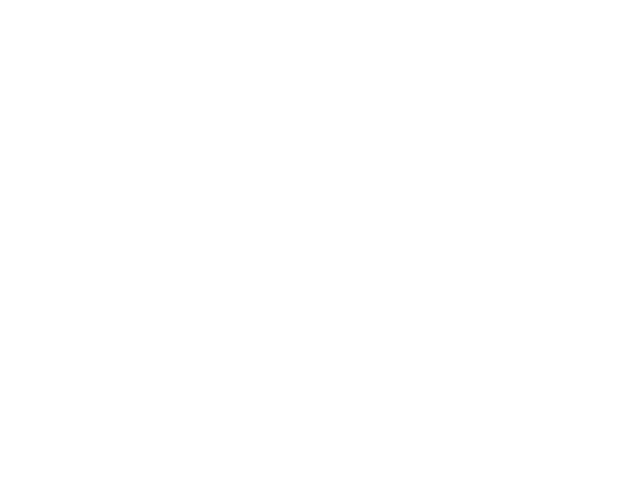

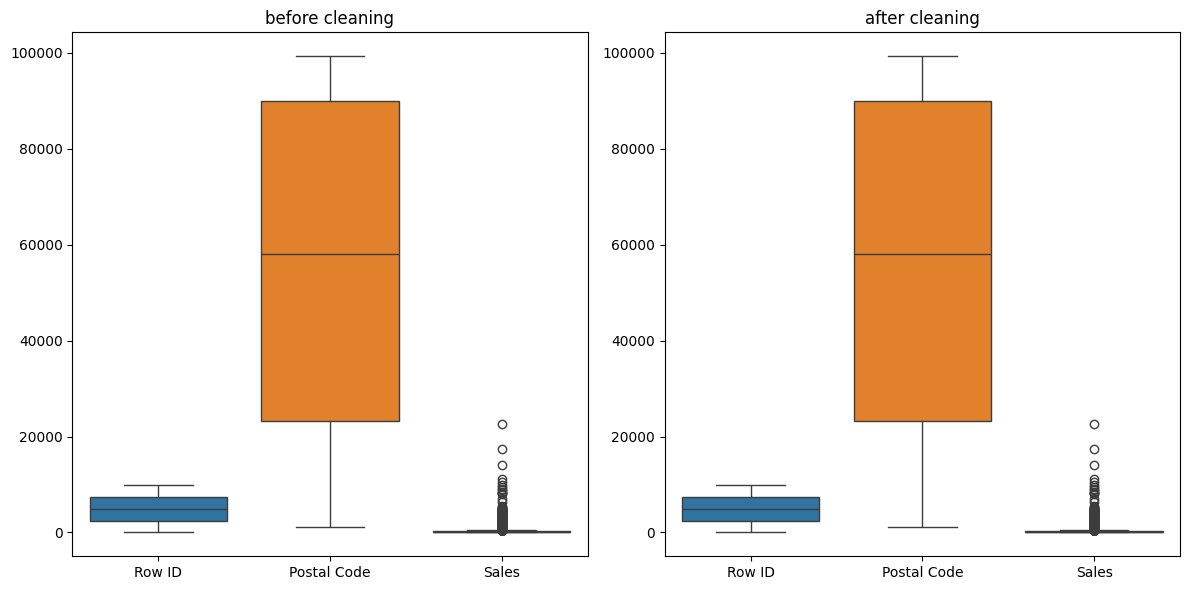

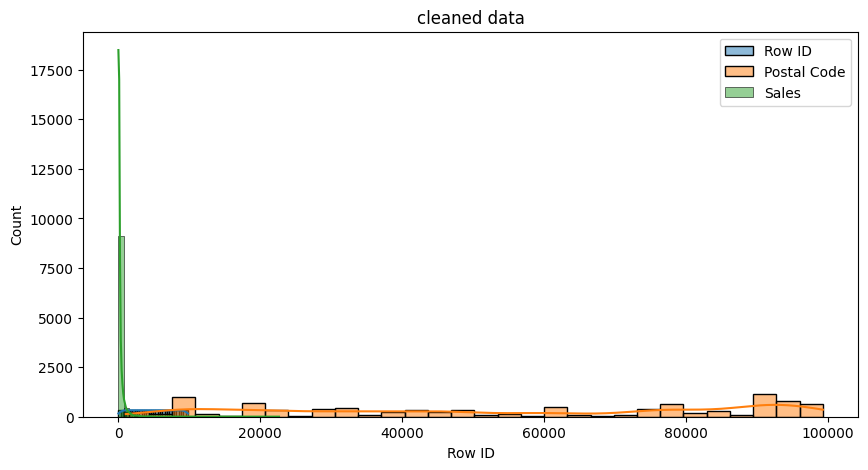

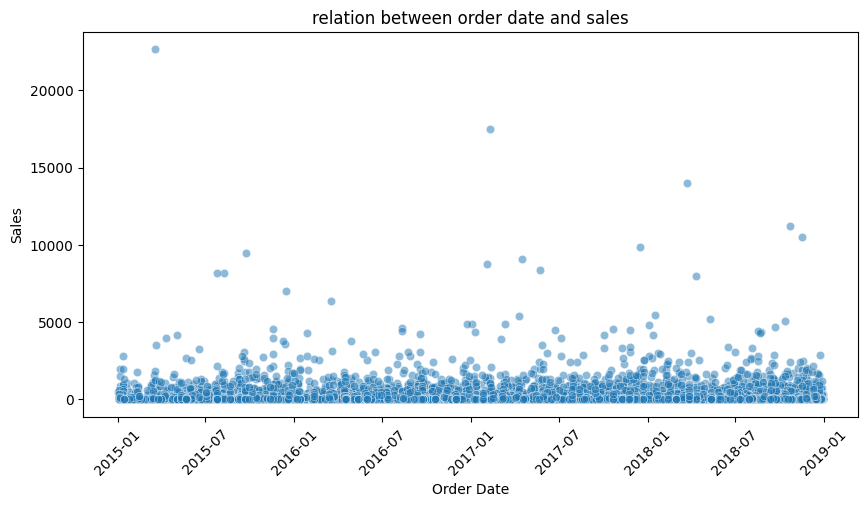

<ipython-input-5-abf4708d91e8>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Ship Mode', palette='viridis')


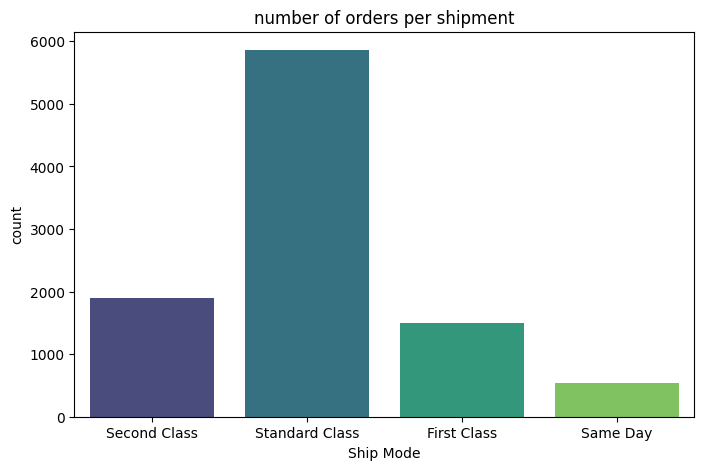

تم حفظ البيانات في ملف 'cleaned_sales_store.csv'
/content
 data.csv  'sales store.csv'   sample_data


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('sales store.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed')

print("Missing Values:\n", df.isna().sum())
# this is the main function
# def remove_outliers_iqr(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     return data[(data >= lower_bound) & (data <= upper_bound)]
#playground function
# def remove_outliers_iqr(data):
    # Q1 = data.quantile(0.5)
    # Q3 = data.quantile(0.95)
    # IQR = Q3 - Q1

    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR

    # return data[(data >= lower_bound) & (data <= upper_bound)]

numeric_columns = df.select_dtypes(include=['number']).columns
df_cleaned = df.copy()
# df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(remove_outliers_iqr)
# df_cleaned.dropna(inplace=True)
print(f"عدد الصفوف قبل الإزالة: {len(df)}")
print(f"عدد الصفوف بعد الإزالة: {len(df_cleaned)}")
print(f"تمت إزالة {len(df) - len(df_cleaned)} صفوف تحتوي على قيم متطرفة.")
print(df_cleaned.head())

alt = "Sample Visualization"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import base64
from IPython.display import display, Markdown
fig = plt.figure()

data = io.BytesIO()
plt.savefig(data, format='png')
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display(Markdown(F"""![{alt}]({image})"""))
plt.close(fig)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_columns])
plt.title("before cleaning")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned[numeric_columns])
plt.title("after cleaning")

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))
for column in numeric_columns:
    sns.histplot(df_cleaned[column], kde=True, bins=30, label=column)
plt.legend()
plt.title("cleaned data")
plt.show()
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_cleaned, x='Order Date', y='Sales', alpha=0.5)
plt.title("relation between order date and sales")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Ship Mode', palette='viridis')
plt.title("number of orders per shipment")
plt.show()
# df_cleaned.to_excel('cleaned_data.xlsx', index=False)
print("تم حفظ البيانات في ملف 'cleaned_sales_store.csv'")
df_cleaned.head()

df_cleaned.to_csv('data.csv', index=False)

!pwd
!ls



In [ ]:
df_cleaned.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful